In [16]:
import sys
sys.path.insert(0, 'python')
from sentinel_downloader import *
#from get_modis import *
#from geo_trans import *
#import glob
from downloader_and_file_finder import *
from fastRWpkl import *
import pylab as plt
%matplotlib inline

In [17]:
def dload_sent_mod(lat, lon, start, end, directory = '/home/ucfafyi/DATA/Sentinel/', flist=True):
    download_sentinel_amazon(lat, lon, start, directory+'s_data/', end_date=end)
    h,v = mtile_cal(lat,lon)
    get_modisfiles( 'MOTA', 'MCD43A1.005',start.year , 'h%02dv%02d'%(h,v), None, 
                       doy_start=start.timetuple().tm_yday, doy_end=end.timetuple().tm_yday, out_dir=directory+'m_data/')
    get_modisfiles( 'MOTA', 'MCD43A2.005',start.year , 'h%02dv%02d'%(h,v), None, 
                       doy_start=start.timetuple().tm_yday, doy_end=end.timetuple().tm_yday, out_dir=directory+'m_data/')

In [10]:
datetime.datetime(2016,1,1).timetuple().tm_yday, datetime.datetime(2016,8,1).timetuple().tm_yday

(122, 153)

In [8]:
def file_finder(directory):
    fnames = []
    for path, subdirs, files in os.walk(directory):
        for name in files:
            fnames.append( os.path.join(path, name))
    return np.array(fnames)

In [231]:
sfnames = file_finder('s_data')
dates = np.array([i.split('/')[-5:-2] for i in sfnames if i[-7:]=='B01.jp2']).astype(int)
sdates = np.array([datetime .datetime(i[0], i[1], i[2]).timetuple().tm_yday for i in dates])
print sdates

[124 134 144 147]


In [232]:
mfnames = file_finder('m_data')
mdates = np.array([i.split('.')[1][5:] for i in mfnames if (i[len('m_data')+1:len('m_data')+8]=='MCD43A1')&(i.split('.')[1][1:5]=='2016')]).astype(int)
mdates.sort()
mdates

array([129, 137, 145])

In [22]:
import datetime
directory = '/home/ucfafyi/DATA/Sentinel/'
#m = mgrs.MGRS()
lat, lon = 37.181944, 114.36
#mg_coor = m.toMGRS(lat, lon, MGRSPrecision=4)
start = datetime.datetime(2016, 1, 1)
end = datetime.datetime(2016,8,16)
dload_sent_mod(lat, lon, start, end, directory)

Done with /home/ucfafyi/DATA/Sentinel/s_data/50/S/KG/2016/1/4/0/preview.jp2
Done with /home/ucfafyi/DATA/Sentinel/s_data/50/S/KG/2016/1/4/0/metadata.xml
Done with /home/ucfafyi/DATA/Sentinel/s_data/50/S/KG/2016/1/4/0/productInfo.json
Done with /home/ucfafyi/DATA/Sentinel/s_data/50/S/KG/2016/1/4/0/preview.jpg
Done with /home/ucfafyi/DATA/Sentinel/s_data/50/S/KG/2016/1/4/0/B10.jp2
Done with /home/ucfafyi/DATA/Sentinel/s_data/50/S/KG/2016/1/4/0/tileInfo.json
Done with /home/ucfafyi/DATA/Sentinel/s_data/50/S/KG/2016/1/4/0/qi/MSK_DEFECT_B01.gml
Done with /home/ucfafyi/DATA/Sentinel/s_data/50/S/KG/2016/1/4/0/qi/MSK_DEFECT_B02.gml
Done with /home/ucfafyi/DATA/Sentinel/s_data/50/S/KG/2016/1/4/0/qi/MSK_DEFECT_B03.gml
Done with /home/ucfafyi/DATA/Sentinel/s_data/50/S/KG/2016/1/4/0/qi/MSK_DEFECT_B04.gml
Done with /home/ucfafyi/DATA/Sentinel/s_data/50/S/KG/2016/1/4/0/B09.jp2
Done with /home/ucfafyi/DATA/Sentinel/s_data/50/S/KG/2016/1/4/0/qi/MSK_DEFECT_B06.gml
Done with /home/ucfafyi/DATA/Sentinel/

In [5]:
m = mgrs.MGRS()
mg_coor = m.toMGRS(lat, lon, MGRSPrecision=4)

In [235]:
dif = abs(sdates.reshape(len(sdates),1)-mdates)
si,mi = np.where(dif==dif.min())
sd = datetime.datetime(2016, 1, 1) + datetime.timedelta(sdates[si][0] - 1)
y,m,d = sd.year, sd.month, sd.day
sdi = directory + 's_data'+'/%s/%s/%s/%s/%s/%s/0/'%(mg_coor[:2], mg_coor[2], mg_coor[3:5], y,m,d)
mdi = [directory+i for i in mfnames if (i.split('.')[1])[5:]=='%s'%mdates[mi][0]]

In [2]:
directory = '/home/ucfafyi/DATA/Sentinel/'

def file_finder(directory):
    fnames = []
    for path, subdirs, files in os.walk(directory):
        for name in files:
            fnames.append( os.path.join(path, name))
    return np.array(fnames)

def get_closet(lat, lon, year, p=True):
    
    m = mgrs.MGRS()
    mg_coor = m.toMGRS(lat, lon, MGRSPrecision=4)
    
    h,v = mtile_cal(lat, lon)
    
    sfnames = file_finder('s_data')
    #print sfnames[0][7:9] ==mg_coor[:2], sfnames[0][10]==mg_coor[2], sfnames[0][12:14]==mg_coor[3:5]
    dates = np.array([i.split('/')[-5:-2] for i in sfnames if ((i[-7:]=='B01.jp2')&(i[7:9]==mg_coor[:2])&(i[10]==mg_coor[2])&(i[12:14]==mg_coor[3:5]))&(i[15:19]=='%s'%year)]).astype(int)
    sdates = np.array([datetime .datetime(i[0], i[1], i[2]).timetuple().tm_yday for i in dates])
    
    mfnames = file_finder('m_data')
    mdates = np.array([i.split('.')[1][5:] for i in mfnames if (i[len('m_data')+1:len('m_data')+8]=='MCD43A1')&(i.split('.')[1][1:5]=='%s'%year)&(i.split('.')[2]=='h%02dv%02d'%(h,v))]).astype(int)
    mdates.sort()
    if p:
        print 'sentinel dates: ',sdates, '\nmodis dates, ', mdates, '\n'
    
    dif = abs(sdates.reshape(len(sdates),1)-mdates)
    si,mi = np.where(dif<3)
    sdi = []
    mdi = []
    for i,j in enumerate(sdates[si]):
        sd = datetime.datetime(year, 1, 1) + datetime.timedelta(j - 1)
        y,m,d = sd.year, sd.month, sd.day
        sdi.append(directory + 's_data'+'/%s/%s/%s/%s/%s/%s/0/'%(mg_coor[:2], mg_coor[2], mg_coor[3:5], y,m,d))
        mdi.append([directory+ii for ii in mfnames if (ii.split('.')[1])[1:]=='%s%s'%(year,mdates[mi][i])])
    if p:
        print 'modis files: ', np.array(mdi),'\n\n', 'sentinel files directory: ', np.array(sdi), '\n'
    return np.array(sdi), np.array(mdi)

In [6]:
import urllib2, base64
from cookielib import CookieJar

username = "marcyin"
password = "Marc1234"
url = 'http://e4ftl01.cr.usgs.gov/MOTA/MCD43A1.005//2016.05.08/MCD43A1.A2016129.h27v05.005.2016147194227.hdf'
cj = CookieJar()
opener = urllib2.build_opener(urllib2.HTTPCookieProcessor(cj))

request = urllib2.Request(url)
base64string = base64.encodestring('%s:%s' % (username, password)).replace('\n', '')
request.add_header("Authorization", "Basic %s" % base64string)   
the_remote_file = opener.open(request)
the_remote_file.headers.dict

In [1]:
#fpath = '/home/ucfafyi/DATA/Sentinel/s_data/50/S/KG/2016/5/23/0/'
#bands = readfile([2, 4,8], fpath)

In [18]:
import sys
sys.path.insert(0,'python')
from readSent import *
import scipy
import scipy.stats
from scipy import interpolate, ndimage,optimize
from classification import *
from scipy.ndimage.morphology import binary_dilation as bd

def get_cloud_mask(sfpath, do_post=False):


    cl = classification(fhead = sfpath, bands = (2,3,4,8,11,12,13), bounds = None)
    cl.Get_cm_p()

    struct1 = ndimage.generate_binary_structure(2, 1)
    mask = bd(cl.cm, structure=struct1, iterations=4).astype(cl.cm.dtype)

    m = cl.cp>0# a combination of all posible cloud mask to maximumly remove those cloud pixels
    cm = (m|mask)
    rr,cc = np.where(~cm)    
    cf = rr,cc
    del cl
    
    if np.nansum(cm)/(10980.*10980.)>0.6:
        print 'more than 60% are cloud, cloud proportion: ',np.nansum(cm)/(10980.*10980.)
        return cm
    elif do_post:
        bands = readfile([2, 4,8], sfpath)
        b2 = bands['B02']
        b4 = bands['B04']
        b8 = bands['B08']
        cm = post_cloud(b2,b4,b8,cf)
        return cm
    else:
        return cm

def cost(p, bands=None, cf=None):
    rr,cc= cf
    p1, p2, p3  = p
    tc = p1*b2[rr,cc]-p2*b4[rr,cc]
    cl = tc<tc.mean()-p3*tc.std()
    clpix = [rr[cl], cc[cl]]
    r = scipy.stats.linregress(b4[clpix[0], clpix[1]],b2[clpix[0], clpix[1]])
    return 1-r.rvalue

def hot(b2,b4,b8,cf, op=False):
    rr,cc=cf
    p=[ 1.41283864e+04, 5.41603017e+03, 1.06467703e+00]
    if op:
        psolve = optimize.fmin(cost, p ,args=((b2,b4,b8),cf), full_output=1)
        p = psolve[0]
    else:
        pass
    
    tc = p[0]*b2[rr,cc]- p[1]*b4[rr,cc]
    
    cl = tc<(tc.mean()-p[2]*tc.std())
    clpix = [rr[cl], cc[cl]]
    r = scipy.stats.linregress(b4[clpix[0], clpix[1]],b2[clpix[0], clpix[1]])
    arc = np.arctan(r.slope)
    
    arc = np.arctan(r.slope)
    #hzpix = [rr[~cl], cc[~cl]]
    
    hot = np.sin(arc)*b2 - np.cos(arc)*b4
    
    #hzhot = np.sin(arc)*b2[hzpix[0], hzpix[1]] - np.cos(arc)*b4[hzpix[0], hzpix[1]]
    clmean = np.nanmean(np.sin(arc)*b2[clpix[0], clpix[1]] - np.cos(arc)*b4[clpix[0], clpix[1]])
    
    return hot, clmean

def post_cloud(b2,b4,b8,cf, do_it_anyway=False):
    
    all_hot, clmean = hot(b2,b4,b8, cf)
    ints = [clmean+i*0.001 for i in range(100)]
    lbs = np.array([np.histogram(b8[all_hot>i])[1][0] for i in ints])
    
    adjust = lbs[lbs>0] - lbs[0]
    y,x = np.array(ints)[adjust>0], adjust[adjust>0]
    r = scipy.stats.linregress(y,x)
    if r.rvalue<0.95:
        print 'Rvalue is low: ', r.rvalue, 'Maybe alterlative cloud classification is needed.'
        if do_it_anyway:
            print r
            test = np.zeros_like(b8)
            test[:] = np.nan
            test[all_hot>clmean] = all_hot[all_hot>clmean]*r.slope + r.intercept
            test[all_hot<clmean] = 0
            test[test<0] = 0

            cloud = test > 0.15
            struct1 = ndimage.generate_binary_structure(2, 1)
            cloud = bd(cloud, structure=struct1, iterations=3).astype(cloud.dtype)
        else:
            return 0
    else:   
        print r
        test = np.zeros_like(b8)
        test[:] = np.nan
        test[all_hot>clmean] = all_hot[all_hot>clmean]*r.slope + r.intercept
        test[all_hot<clmean] = 0
        test[test<0] = 0
        
        cloud = test > 0.15
        struct1 = ndimage.generate_binary_structure(2, 1)
        cloud = bd(cloud, structure=struct1, iterations=3).astype(cloud.dtype)
        return cloud

In [75]:
def get_closet(lat, lon, year, p=True):
    
    m = mgrs.MGRS()
    mg_coor = m.toMGRS(lat, lon, MGRSPrecision=4)
    
    h,v = mtile_cal(lat, lon)
    
    sfnames = np.sort(file_finder('s_data'))
    #print sfnames[0][7:9] ==mg_coor[:2], sfnames[0][10]==mg_coor[2], sfnames[0][12:14]==mg_coor[3:5]
    dates = np.array([i.split('/')[-5:-2] for i in sfnames if ((i[-7:]=='B01.jp2')&(i[7:9]==mg_coor[:2])&(i[10]==mg_coor[2])&(i[12:14]==mg_coor[3:5]))&(i[15:19]=='%s'%year)]).astype(int)
    sdates = np.array([datetime .datetime(i[0], i[1], i[2]).timetuple().tm_yday for i in dates])
    sdates.sort()
    mfnames = file_finder('m_data')
    mdates = np.array([i.split('.')[1][5:] for i in mfnames if (i[len('m_data')+1:len('m_data')+8]=='MCD43A1')&(i.split('.')[1][1:5]=='%s'%year)&(i.split('.')[2]=='h%02dv%02d'%(h,v))]).astype(int)
    mdates.sort()
    if p:
        print 'sentinel dates: ',sdates, '\nmodis dates, ', mdates, '\n'
    
    try:
        dif = abs(sdates.reshape(len(sdates),1)-mdates)
        si,mi = np.where(dif<4)
        sdi = []
        mdi = []
        for i,j in enumerate(sdates[si]):
            sd = datetime.datetime(year, 1, 1) + datetime.timedelta(j - 1)
            y,m,d = sd.year, sd.month, sd.day
            sdi.append(directory + 's_data'+'/%s/%s/%s/%s/%s/%s/0/'%(mg_coor[:2], mg_coor[2], mg_coor[3:5], y,m,d))
            mdi.append([directory+ii for ii in mfnames if (ii.split('.')[1])[1:]=='%s%03d'%(year,mdates[mi][i])])
        if p:
            print 'modis files: ', np.array(mdi),'\n\n', 'sentinel files directory: ', np.array(sdi), '\n'
        return np.array(sdi), np.array(mdi)
    except:
        print 'One/both of two kinds of file dose not exist, see above if print is True!!'
        return 0

In [76]:
sfpath=[]
mfiles = []
lat, lon = 37.181944, 114.36
sfpath, mfiles = get_closet(lat, lon,2016,0)
#cm = get_cloud_mask(sfpath[1])

In [79]:
sfpath

array(['/home/ucfafyi/DATA/Sentinel/s_data/50/S/KG/2016/1/4/0/',
       '/home/ucfafyi/DATA/Sentinel/s_data/50/S/KG/2016/1/14/0/',
       '/home/ucfafyi/DATA/Sentinel/s_data/50/S/KG/2016/1/17/0/',
       '/home/ucfafyi/DATA/Sentinel/s_data/50/S/KG/2016/1/24/0/',
       '/home/ucfafyi/DATA/Sentinel/s_data/50/S/KG/2016/2/3/0/',
       '/home/ucfafyi/DATA/Sentinel/s_data/50/S/KG/2016/2/16/0/',
       '/home/ucfafyi/DATA/Sentinel/s_data/50/S/KG/2016/3/4/0/',
       '/home/ucfafyi/DATA/Sentinel/s_data/50/S/KG/2016/4/3/0/',
       '/home/ucfafyi/DATA/Sentinel/s_data/50/S/KG/2016/4/13/0/',
       '/home/ucfafyi/DATA/Sentinel/s_data/50/S/KG/2016/4/16/0/',
       '/home/ucfafyi/DATA/Sentinel/s_data/50/S/KG/2016/4/23/0/',
       '/home/ucfafyi/DATA/Sentinel/s_data/50/S/KG/2016/5/3/0/',
       '/home/ucfafyi/DATA/Sentinel/s_data/50/S/KG/2016/5/13/0/',
       '/home/ucfafyi/DATA/Sentinel/s_data/50/S/KG/2016/5/23/0/',
       '/home/ucfafyi/DATA/Sentinel/s_data/50/S/KG/2016/5/26/0/',
       '/home/u

In [80]:
mfiles

array([[ '/home/ucfafyi/DATA/Sentinel/m_data/MCD43A1.A2016001.h27v05.005.2016018082646.hdf',
        '/home/ucfafyi/DATA/Sentinel/m_data/MCD43A2.A2016001.h27v05.005.2016018082646.hdf'],
       [ '/home/ucfafyi/DATA/Sentinel/m_data/MCD43A1.A2016017.h27v05.005.2016035005031.hdf',
        '/home/ucfafyi/DATA/Sentinel/m_data/MCD43A2.A2016017.h27v05.005.2016035005032.hdf'],
       [ '/home/ucfafyi/DATA/Sentinel/m_data/MCD43A1.A2016017.h27v05.005.2016035005031.hdf',
        '/home/ucfafyi/DATA/Sentinel/m_data/MCD43A2.A2016017.h27v05.005.2016035005032.hdf'],
       [ '/home/ucfafyi/DATA/Sentinel/m_data/MCD43A1.A2016025.h27v05.005.2016042084925.hdf',
        '/home/ucfafyi/DATA/Sentinel/m_data/MCD43A2.A2016025.h27v05.005.2016042084925.hdf'],
       [ '/home/ucfafyi/DATA/Sentinel/m_data/MCD43A1.A2016033.h27v05.005.2016050091227.hdf',
        '/home/ucfafyi/DATA/Sentinel/m_data/MCD43A2.A2016033.h27v05.005.2016050091227.hdf'],
       [ '/home/ucfafyi/DATA/Sentinel/m_data/MCD43A1.A2016049.h27v05.0

In [58]:
import sys
sys.path.insert(0,'python')
import numpy.ma as ma
from readSent import *
from collections import Counter
import cPickle as pkl
from scipy import optimize
from functools import partial
import scipy.ndimage as ndimage
import numpy as np
import scipy
from scipy import signal
import scipy.stats

fhead = sfpath[1]

def gaussian(xwin, ywin, xstd, ystd, angle, norm = True):
    win = max(xwin, ywin)
    winx = win*2**0.5
    winy = win*2**0.5
    
    xstd = xstd*2**0.5
    ystd = ystd*2**0.5
        
    xgaus = signal.gaussian(winx, xstd)
    ygaus = signal.gaussian(winy, ystd)
    gaus  = np.outer(xgaus, ygaus)
    r_gaus = scipy.ndimage.interpolation.rotate(gaus, angle, reshape=True)
    center = np.array(r_gaus.shape)/2
    cgaus = r_gaus[center[0]-xwin/2: center[0]+xwin/2, center[1]-ywin/2:center[1]+ywin/2]
    if norm:
        return cgaus/cgaus.sum()
    else:
        return cgaus

def cost(p, sent, sinds, mod, minds):    
    xstd,ystd,angle, xs, ys, windsize = p
    xwin,ywin = windsize, windsize
    
    to_regression =[]          
    cx = sinds[0]
    cy = sinds[1]
    mx = minds[0]
    my = minds[1]
    
    gaus = gaussian(xwin,ywin,xstd,ystd,angle,False)                              
    ker = gaus/(gaus.sum())

    s = signal.fftconvolve(sent, ker, mode='same')
    
    vld_x = ((cx+xs)>50)&((cx+xs)<9950)
    vld_y = ((cy+ys)>50)&((cy+ys)<9950)
    vld = vld_x&vld_y
    
    
    indx,indy = np.round((cx+xs)[vld]).astype(int), np.round((cy+ys)[vld]).astype(int)
    vals = s[indx,indy]
    brdf = mod[mx[vld], my[vld]]
    
    x,y = vals, brdf
    dif = abs(x-y)
    outliers = dif>0.15
    nanm = (np.isnan(x))|(np.isnan(y))|outliers
    r = scipy.stats.linregress(x[~nanm],y[~nanm])
    global x,y, nanm
    costs = abs(1-r.rvalue)
    print 'costs:', costs, 'rvalue: ', r.rvalue, 'slop: ', r.slope, '\n', 'parameters: ', p,'\n'
    return costs

def ScaleExtent(data, shape): # used for unifine different array,

    re = int(shape[0]/(data.shape[0]))

    a = np.repeat(np.repeat(data, re, axis = 1), re, axis =0)
    
    if (re*(data.shape[0])-shape[0]) != 0:
        extended = np.zeros(shape)
        extended[:re*(data.shape[0]),:re*(data.shape[0])] = a
        extended[re*(data.shape[0]):,re*(data.shape[0]):] = a[re*(data.shape[0])-shape[0]:, re*(data.shape[0])-shape[0]]
        return extended
    else:
        return a

def get_psf(brdf, sent, sinds, mod, minds):
    sent = ScaleExtent(sent, (10980,10980))
    p = np.array([23.9744718775, 306.15258185, 7.91598096945, -21.5616564408, 59.7537708998, 100])
    psolve = optimize.fmin(cost,p,full_output=1, args=(sent,sinds, mod, minds))
    print 'solved: ', psolve
    parallel_rw_pkl(psolve, 'b12_6para_solve', 'w')

    print 'lol finished swhsol b12 again!!!!!'                                  
   

lat, lon, year = 37.181944, 114.36, 2016
sfiles, mfiles = get_closet(lat, lon,year,0)
for i, j in enumerate(sfiles):
    if i==0:
        #sentm = get_cloud_mask(sfpath[i])
        print 'Cloud proportion: ', sentm.sum()/(10980.*10980.)
        for ii,jj in enumerate([2,3,4,8,13,11,12]):
            #sent = readfile([jj,], sfpath[i])
            #sent = sent['B02']
            sent[sentm]=10000
            if ii<4:
                brdfs[ii][brdfs[ii].mask] = np.nan
                get_psf(brdf, sent, minds, brdfs[ii]*0.001, sinds)
            else:
                brdfs[ii-1][brdfs[ii-1].mask] = np.nan
            
                get_psf(brdf, sent, minds, brdfs[ii]*0.001, sinds)
    else:
        sentm = get_cloud_mask(sfiles[i])
        if sentm.sum()/(10980.*10980.) <0.2:
            print 'Cloud proportion: ', sentm.sum()/(10980.*10980.)
            minds, sinds = get_coords(lat,lon) 
            modis_filenames = gdal.Open(mfiles[i][0]).GetSubDatasets()
            modisQA = gdal.Open(mfiles[i][1]).GetSubDatasets()

            brdfs = get_rs(modisQA, modis_filenames, )
            for ii,jj in enumerate([2,3,4,8,13,11,12]):
                sent = readfile([jj,], sfiles[i])
                sent[sentm]=100000000000
                if ii<4:
                    brdfs[ii][brdfs[ii].mask] = np.nan                
                    get_psf(brdf, sent,sinds, brdfs[ii]*0.001, minds)
                else:
                    brdfs[ii-1][brdfs[ii-1].mask] = np.nan
                    get_psf(brdf, sent,sinds, brdfs[ii]*0.001, minds)

        else:
            print 'Too much cloud, and this tile is considered as invalid.'

<ipython-input-58-e9e3f8216da5>:66: SyntaxWarning: name 'x' is assigned to before global declaration
  global x,y, nanm
<ipython-input-58-e9e3f8216da5>:66: SyntaxWarning: name 'y' is assigned to before global declaration
  global x,y, nanm
<ipython-input-58-e9e3f8216da5>:66: SyntaxWarning: name 'nanm' is assigned to before global declaration
  global x,y, nanm


Cloud proportion:  0.0550889429697


/data/store01/data_dirs/students/ucfafyi/.conda/envs/gdal_env/lib/python2.7/site-packages/ipykernel/__main__.py:31: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/data/store01/data_dirs/students/ucfafyi/.conda/envs/gdal_env/lib/python2.7/site-packages/ipykernel/__main__.py:63: RuntimeWarning: invalid value encountered in greater


costs: 0.196933321627 rvalue:  0.803066678373 slop:  0.703574251632 
parameters:  [  23.97447188  306.15258185    7.91598097  -21.56165644   59.7537709   100.        ] 

costs: 0.19697046171 rvalue:  0.80302953829 slop:  0.703704222277 
parameters:  [  25.17319547  306.15258185    7.91598097  -21.56165644   59.7537709   100.        ] 

costs: 0.19693380136 rvalue:  0.80306619864 slop:  0.703574687474 
parameters:  [  23.97447188  321.46021094    7.91598097  -21.56165644   59.7537709   100.        ] 

costs: 0.196434168447 rvalue:  0.803565831553 slop:  0.704237644593 
parameters:  [  23.97447188  306.15258185    8.31178002  -21.56165644   59.7537709   100.        ] 

costs: 0.196351483914 rvalue:  0.803648516086 slop:  0.703660651915 
parameters:  [  23.97447188  306.15258185    7.91598097  -22.63973926   59.7537709   100.        ] 

costs: 0.195445290386 rvalue:  0.804554709614 slop:  0.705009436036 
parameters:  [  23.97447188  306.15258185    7.91598097  -21.56165644   62.74145944
 

KeyboardInterrupt: 

In [55]:
0.2*(10980*10980)

(array([  3.18843920e+03,   2.02047782e+02,   1.20227299e-01, ...,
          5.73204438e+01,   8.64646985e+01,   1.93500721e+01]),
 masked_array(data = [0.048 0.039 0.023 ..., 0.043048469882317225 0.03919199910947309
  0.028905793494887914],
              mask = [False False False ..., False False False],
        fill_value = 1e+20),
 masked_array(data = [ True  True False ...,  True  True  True],
              mask = False,
        fill_value = True))

(array([ 0.1202273 ,  0.12356278,  0.13107657, ...,  0.14028158,
         0.13517518,  0.13487999]),
 masked_array(data = [0.023 0.028 0.03501323419112065 ..., 0.0461025432517205
  0.04461483723294325 0.04482308755825344],
              mask = [False False False ..., False False False],
        fill_value = 1e+20))

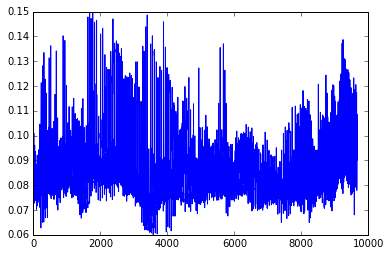

In [57]:
plt.plot(x[~nanm]-y[~nanm])

In [13]:
import gdal
sfpath, mfiles = get_closet(lat, lon,year,0)
modis_filenames = gdal.Open(mfiles[0][0]).GetSubDatasets()
modisQA = gdal.Open(mfiles[0][1]).GetSubDatasets()

In [19]:
import gdal
import numpy as np
import numpy.ma as ma
import kernels
from geo_trans import *

def r_modis(fname):
    g = gdal.Open(fname)
    if g is None:
        raise IOError
    else:
        return g.ReadAsArray()


def ScaleExtent(data, shape): # used for unifine different array,

    re = int(shape[0]/(data.shape[0]))

    a = np.repeat(np.repeat(data, re, axis = 1), re, axis =0)
    
    if re*(data.shape[0]-shape[0]) != 0:
        extended = np.zeros(shape)
        extended[:re*(data.shape[0]),:re*(data.shape[0])] = a
        extended[re*(data.shape[0]):,re*(data.shape[0]):] = a[re*(data.shape[0])-shape[0]:, re*(data.shape[0])-shape[0]]
        return extended
    else:
        return a
#bands = [2,3,4,8,13,11,12]


def get_kk(fhead):
    mete = readxml('%smetadata.xml'%fhead)
    vZa = np.array([i+ np.zeros((23,23)) for i in mete['mVz']])
    vAa = np.array([i+ np.zeros((23,23)) for i in mete['mVa']])
    sza = mete['mSz'][0]
    vza = mete['mVz'][3]
    rel_a = (mete['mSa']-mete['mVa'])[3]
    kk = kernels.Kernels(vza ,sza,rel_a,\
                         RossHS=False,MODISSPARSE=True,\
                         RecipFlag=True,normalise=1,\
                         doIntegrals=False,LiType='Dense',RossType='Thick')
    return kk



def get_rs(modisQA, modis_filenames, fhead):
    
    kk = get_kk(fhead)
    k_vol = kk.Ross
    k_geo   = kk.Li
    iso =  kk.Isotropic
    
    brdfs = []
    QA = r_modis(modisQA[0][0])


    for i in [2,3,0,1,5,6]:
        br = r_modis(modis_filenames[i][0])
    
        mask = (br[0] > 32766) | (br[1] > 32766) |(br[2] > 32766)| (QA>1)
        brdf = br[0] + br[1]*k_vol + br[2]*k_geo
        brdf = ma.array(brdf, mask = mask)
        brdfs.append(brdf)
        
    return brdfs


In [ ]:
import sys
sys.path.insert(0,'python')
import numpy.ma as ma
from collections import Counter
import cPickle as pkl
from scipy import optimize
from functools import partial
import scipy.ndimage as ndimage
import numpy as np
import scipy
from scipy import signal
import scipy.stats
from downloader_and_file_finder import *
from cloud import *
from fastRWpkl import *
import numpy 
from numpy import clip, where
from scipy.ndimage.morphology import *
import xml.etree.cElementTree as ET
import multiprocessing
from get_r import *

def gaussian(xwin, ywin, xstd, ystd, angle, norm = True):
    win = max(xwin, ywin)
    winx = win*2**0.5
    winy = win*2**0.5
    
    xstd = xstd*2**0.5
    ystd = ystd*2**0.5
        
    xgaus = signal.gaussian(winx, xstd)
    ygaus = signal.gaussian(winy, ystd)
    gaus  = np.outer(xgaus, ygaus)
    r_gaus = scipy.ndimage.interpolation.rotate(gaus, angle, reshape=True)
    center = np.array(r_gaus.shape)/2
    cgaus = r_gaus[center[0]-xwin/2: center[0]+xwin/2, center[1]-ywin/2:center[1]+ywin/2]
    if norm:
        return cgaus/cgaus.sum()
    else:
        return cgaus

def cost(p, sent, sinds, mod, minds):    
    xstd,ystd,angle, xs, ys, windsize = p
    xwin,ywin = windsize, windsize
    
    to_regression =[]          
    cx = sinds[0]
    cy = sinds[1]
    mx = minds[0]
    my = minds[1]
    
    gaus = gaussian(xwin,ywin,xstd,ystd,angle,False)                              
    ker = gaus/(gaus.sum())

    s = signal.fftconvolve(sent, ker, mode='same')
    
    vld_x = ((cx+xs)>xwin/2)&((cx+xs)<10000-xwin/2)
    vld_y = ((cy+ys)>ywin/2)&((cy+ys)<10000-ywin/2)
    vld = vld_x&vld_y
    
    
    indx,indy = np.round((cx+xs)[vld]).astype(int), np.round((cy+ys)[vld]).astype(int)
    vals = s[indx,indy]
    brdf = mod[mx[vld], my[vld]]
    print brdf, vals
    x,y = vals, brdf
    dif = abs(x-y)
    outliers = dif>0.15
    nanm = (np.isnan(x))|(np.isnan(y))|outliers
    r = scipy.stats.linregress(x[~nanm],y[~nanm])
    costs = abs(1-r.rvalue)
    print 'costs:', costs, 'rvalue: ', r.rvalue, 'slop: ', r.slope, '\n','inter',r.intercept, '\n', 'parameters: ', p,'\n'
    return costs

def ScaleExtent(data, shape): # used for unifine different array,

    re = int(shape[0]/(data.shape[0]))

    a = np.repeat(np.repeat(data, re, axis = 1), re, axis =0)
    
    if (re*(data.shape[0])-shape[0]) != 0:
        extended = np.zeros(shape)
        extended[:re*(data.shape[0]),:re*(data.shape[0])] = a
        extended[re*(data.shape[0]):,re*(data.shape[0]):] = a[re*(data.shape[0])-shape[0]:, re*(data.shape[0])-shape[0]]
        return extended
    else:
        return a

def get_psf(sent, sinds, mod, minds, i, jj):
    p = np.array([23.9744718775, 306.15258185, 7.91598096945, -21.5616564408, 59.7537708998, 100])
    psolve = optimize.fmin(cost,p,full_output=1, args=(sent,sinds, mod, minds))
    print 'solved: ', psolve
    parallel_rw_pkl(psolve, 'b%02d%s_6para_solve'%(jj,i), 'w')

    print 'lol finished b%02d%s!!!!!'%(jj, i)

def op(ind, fn=None):
    
    Sent = gdal_read(bands[ind], path)[keys[ind]]
    sent = ScaleExtent(Sent, (10980,10980)) 
    sent[sentm]=100000000000
    sent[np.isnan(sent)] = 100000000000
    if ind<4:
        brdfs[ind][brdfs[ind].mask] = np.nan                
        get_psf(sent,sinds, brdfs[ind]*0.001, minds, fn,bands[ind])

    else:
        brdfs[ind-1][brdfs[ind-1].mask] = np.nan
        get_psf(sent,sinds, brdfs[ind-1]*0.001, minds, fn,bands[ind])
        

lat, lon, year = 37.181944, 114.36, 2016
sfiles, mfiles = get_closet(lat, lon,year,0)

keys = 'B02', 'B03','B04','B08','B8A','B11','B12'
bands = [2,3,4,8,13,11,12]

i=2
sentm = get_cloud_mask(sfiles[i])

if sentm.sum()/(10980.*10980.) <0.2:
    print 'Cloud proportion: ', sentm.sum()/(10980.*10980.)
    minds, sinds = get_coords(lat,lon) 

    modis_filenames = gdal.Open(mfiles[i][0]).GetSubDatasets()
    modisQA = gdal.Open(mfiles[i][1]).GetSubDatasets()

    brdfs = get_rs(modisQA, modis_filenames, sfiles[i])
    
    par = partial(op, fn=i)
    pool = multiprocessing.Pool(processes = 7)
    retval = pool.map(par, range(7))
    pool.close()
    pool.join()
    
else:
    print 'Too much cloud, and this tile is considered as invalid.'
        

In [ ]:
lat, lon, year = 37.181944, 114.36, 2016
sfiles, mfiles = get_closet(lat, lon,year,0)
sfiles

In [ ]:
(array([  17.27508999,   26.042764  ,    5.25535243,  -20.63880065,
         51.24559016,  222.74458095]), 0.049448000301815398, 150, 326, 0)
 (array([  20.75127313,  277.04941795,    7.19587911,  -25.37382952,
         57.48411956,  114.71689437]), 0.021939764496968106, 101, 254, 0)

In [6]:
ind = 2
path = sfiles[i]
Sent = gdal_read(bands[ind], path)[keys[ind]]